In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
cd /content/gdrive/My Drive/Colab Notebooks/wav

/content/gdrive/My Drive/Untitled folder/wav


In [3]:
import signal_processing, data_load, learn, evaluate, render

Using TensorFlow backend.


In [4]:
num_rows = 32
num_columns = 110
num_channels = 3

num_epochs = 100
num_batch_size = 13
num_speakers = 10
hop_length = 1024
nr_mels = 32
n_fft = 2048
num_seconds = 5.0

fine_tune_at = 300
base_lr = 0.0001

In [5]:
featuresdf = data_load.make_dataframe_melspectrogram(num_speakers, './', num_rows, n_fft, hop_length, num_columns, num_seconds)

Finished feature extraction from  970  files


In [6]:
result_sets = data_load.make_train_test_sets(featuresdf, num_rows, num_columns, num_channels)
num_labels = result_sets[4]

In [7]:
base_model = learn.get_densenet(num_rows, num_columns, num_channels, num_labels, fine_tune_at)

29089792/29084464 [==============================] - 0s 0us/step
Number of layers in the base model:  428
Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 110, 3)] 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 38, 116, 3)   0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 16, 55, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 16, 55, 64)   256         conv1/conv[0][0]

In [8]:
model = learn.build_model_densenet(base_model, num_labels)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Model)          (None, 1024)              7037504   
_________________________________________________________________
dense (Dense)                (None, 10)                10250     
Total params: 7,047,754
Trainable params: 2,899,658
Non-trainable params: 4,148,096
_________________________________________________________________


In [9]:
learn.compile_model_pretrained_net(model, base_lr)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


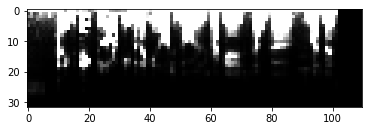

In [10]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
path = 'id10001/9mQ11vBs1wc/00004.wav'
#render.show_mfccs(path, num_rows, num_columns, num_seconds)

data = result_sets[0][1]
plt.imshow(data, cmap=cm.gray)

In [11]:
evaluate.evaluate_before_training(model, result_sets[0], result_sets[2]) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Model)          (None, 1024)              7037504   
_________________________________________________________________
dense (Dense)                (None, 10)                10250     
Total params: 7,047,754
Trainable params: 2,899,658
Non-trainable params: 4,148,096
_________________________________________________________________
25/25 [==============================] - 8s 322ms/step - loss: 5.8077 - accuracy: 0.1263
Pre-training accuracy: 12.6289%


In [12]:
class_weight = learn.calculate_class_weight(featuresdf)
history = learn.train_model_class_weights(model, result_sets, num_epochs, num_batch_size, 'DenseNetMelSpec', 'default', 'DenseNetMelSpec', class_weight=class_weight)

Epoch 1/100
60/60 [==============================] - ETA: 0s - loss: 12.4560 - accuracy: 0.1804
Epoch 00001: val_loss improved from inf to 2.34874, saving model to saved_models/weights.best.DenseNetMelSpec.hdf5
60/60 [==============================] - 17s 276ms/step - loss: 12.4560 - accuracy: 0.1804 - val_loss: 2.3487 - val_accuracy: 0.2010
Epoch 2/100
60/60 [==============================] - ETA: 0s - loss: 10.3433 - accuracy: 0.2874
Epoch 00002: val_loss improved from 2.34874 to 2.11033, saving model to saved_models/weights.best.DenseNetMelSpec.hdf5
60/60 [==============================] - 17s 283ms/step - loss: 10.3433 - accuracy: 0.2874 - val_loss: 2.1103 - val_accuracy: 0.2577
Epoch 3/100
60/60 [==============================] - ETA: 0s - loss: 9.5879 - accuracy: 0.3454
Epoch 00003: val_loss improved from 2.11033 to 2.06838, saving model to saved_models/weights.best.DenseNetMelSpec.hdf5
60/60 [==============================] - 17s 284ms/step - loss: 9.5879 - accuracy: 0.3454 - va

In [13]:
evaluate.evaluate_model(model, 'DenseNetMelSpec', result_sets)

Training Accuracy:  0.9407216310501099
Testing Accuracy:  0.5206185579299927


In [14]:
evaluate.display_metrics(model, 'DenseNetMelSpec', result_sets)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.40      0.25      0.31        16
           1       0.50      0.78      0.61        18
           2       0.62      0.56      0.59        43
           3       0.75      0.30      0.43        20
           4       0.23      0.46      0.31        13
           5       0.68      0.77      0.72        30
           6       0.59      0.71      0.65        14
           7       0.37      0.44      0.40        16
           8       0.40      0.17      0.24        12
           9       0.62      0.42      0.50        12

    accuracy                           0.52       194
   macro avg    

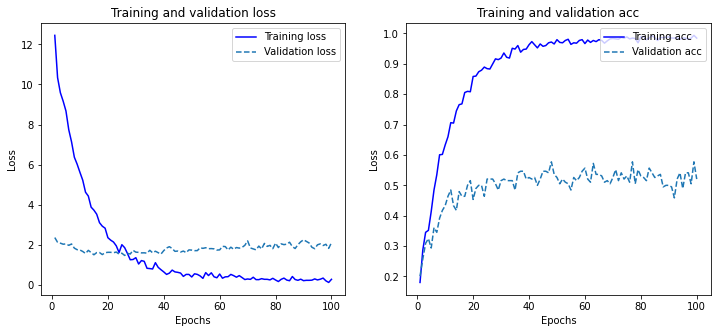

In [15]:
evaluate.plot_history(history)